In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df_ref = pd.read_csv('../output/data/path_redundancy_undivided_low.csv', sep=',', header=0)
df_ref = df_ref.rename(columns={'Unnamed: 0':'Pair ID'}).set_index('Pair ID', drop=True)
df_ref

,Source,Dest,Shortest path length,Cutoff length,Not-too-long paths,Efficient paths,Likelihood < 50,Likelihood < 34,Likelihood < 25
Pair ID,,,,,,,,,
0,0,1,6,8,3177,2765,1666,685,101
1,0,2,6,8,2131,1903,1229,475,144
2,0,5,6,8,7623,6713,5564,3812,1066
3,0,6,4,6,664,538,447,259,259
4,0,7,4,6,232,202,144,61,61
...,...,...,...,...,...,...,...,...,...
3318,95,97,4,6,368,302,209,61,61
3319,95,98,6,8,582,499,308,155,34
3320,96,97,5,7,381,318,123,40,40


In [3]:
df_div = pd.read_csv('../output/data/path_redundancy_divided_low.csv', sep=',', header=0)
df_div = df_div.rename(columns={'Unnamed: 0':'Pair ID'}).set_index('Pair ID', drop=True)
df_div

,Source,Dest,Shortest path length,Cutoff length,Not-too-long paths,Efficient paths,Likelihood < 50,Likelihood < 34,Likelihood < 25
Pair ID,,,,,,,,,
0,72,80,1,3,26,12,12,12,12
1,72,66,2,4,219,176,176,122,122
2,72,42,2,4,338,277,277,214,214
3,72,90,2,4,283,233,233,144,144
4,72,69,3,5,2014,1756,1590,1590,878
...,...,...,...,...,...,...,...,...,...
296,88,58,1,3,9,9,9,9,9
297,88,91,1,3,8,7,7,7,7
298,89,58,1,3,9,9,9,9,9


<AxesSubplot:>

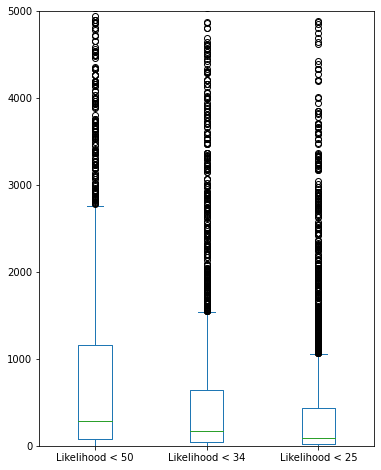

In [28]:
df_ref[['Likelihood < 50','Likelihood < 34','Likelihood < 25']].plot(
    kind='box', 
    figsize=(6,8), 
    ylim=(0,5000))

In [11]:
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pi

Text(0, 0.5, 'Shortest path length')

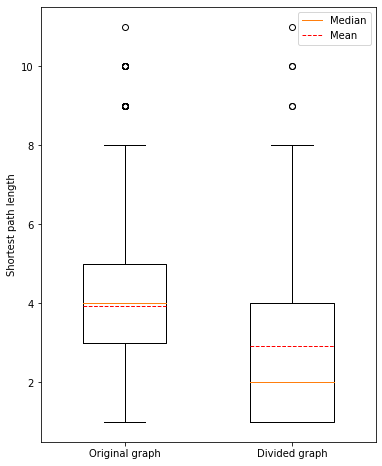

In [44]:
fig,ax = plt.subplots(figsize=(6,8))

bp = ax.boxplot([df_ref['Shortest path length'].tolist(), df_div['Shortest path length'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original graph','Divided graph']) 
ax.set_ylabel('Shortest path length')
#ax.set_xlabel('Node degree')

In [57]:
pairs_ref_25 = df_ref['Likelihood < 25'].sum()
pairs_div_25 = df_div['Likelihood < 25'].sum()

In [58]:
df_ref['Proportion < 25'] = df_ref['Likelihood < 25'] / pairs_ref_25
df_ref

,Source,Dest,Shortest path length,Cutoff length,Not-too-long paths,Efficient paths,Likelihood < 50,Likelihood < 34,Likelihood < 25,Proportion < 25
Pair ID,,,,,,,,,,
0,0,1,6,8,3177,2765,1666,685,101,0.000060
1,0,2,6,8,2131,1903,1229,475,144,0.000085
2,0,5,6,8,7623,6713,5564,3812,1066,0.000630
3,0,6,4,6,664,538,447,259,259,0.000153
4,0,7,4,6,232,202,144,61,61,0.000036
...,...,...,...,...,...,...,...,...,...,...
3318,95,97,4,6,368,302,209,61,61,0.000036
3319,95,98,6,8,582,499,308,155,34,0.000020
3320,96,97,5,7,381,318,123,40,40,0.000024


In [59]:
df_div['Proportion < 25'] = df_div['Likelihood < 25'] / pairs_div_25
df_div

,Source,Dest,Shortest path length,Cutoff length,Not-too-long paths,Efficient paths,Likelihood < 50,Likelihood < 34,Likelihood < 25,Proportion < 25
Pair ID,,,,,,,,,,
0,72,80,1,3,26,12,12,12,12,0.000193
1,72,66,2,4,219,176,176,122,122,0.001960
2,72,42,2,4,338,277,277,214,214,0.003438
3,72,90,2,4,283,233,233,144,144,0.002314
4,72,69,3,5,2014,1756,1590,1590,878,0.014107
...,...,...,...,...,...,...,...,...,...,...
296,88,58,1,3,9,9,9,9,9,0.000145
297,88,91,1,3,8,7,7,7,7,0.000112
298,89,58,1,3,9,9,9,9,9,0.000145


(0.0, 0.01)

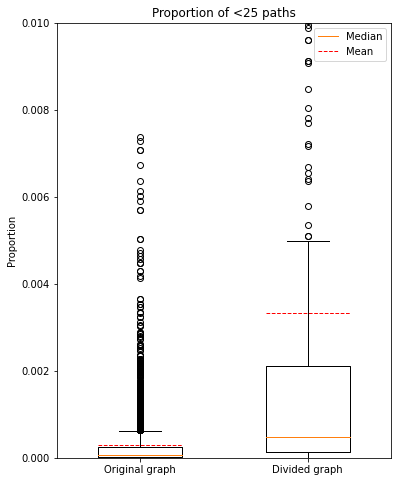

In [63]:
fig,ax = plt.subplots(figsize=(6,8))

bp = ax.boxplot([df_ref['Proportion < 25'].tolist(), df_div['Proportion < 25'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original graph','Divided graph']) 
ax.set_ylabel('Proportion')
ax.set_title('Proportion of <25 paths')
ax.set_ylim((0,0.01))

In [88]:
df_div['Likelihood < 25'].median()

30.0